TOPIC:-**47.Train the system using Adult data set obtained from UCI ML repository, determine accuracy using K-means clustering classifier**

SY AI/DS,
ANUSHKA NITIN UGALE

Roll_no:-47

PRN_no:-1032230569


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
#from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [27]:
#Load the dataset
df=pd.read_csv('/content/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
df.shape

(48842, 15)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [30]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [32]:
df.duplicated().sum()

np.int64(52)

In [33]:
df.drop_duplicates(inplace=True)
df.shape

(48790, 15)

In [34]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [35]:
# Apply Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later decoding

print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1             0             0   
2          11             0     4       1             0             0   
3           7             0     2       1          7688             0   
4           0             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              50              39 

In [36]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['income'])
y = df['income']

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Feature shape after scaling: {X_scaled.shape}")

Feature shape after scaling: (48790, 14)


In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (39032, 14), Test shape: (9758, 14)


K-Means Clustering (Library Implementation)

In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

model.fit(X_train, y_train)
print(model)

# Predict labels for the test set
y_pred = model.predict(X_test) #This line is added to get predicted labels from the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

KMeans(n_clusters=2)
Accuracy Score: 0.6004304160688666


K-Means Clustering (Manual Implementation)

Clustering Accuracy: 76.06%


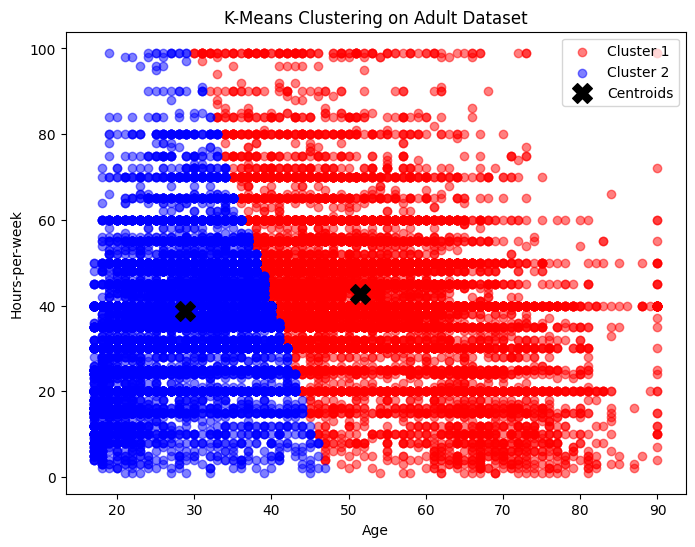

In [45]:
# Select two numerical features for clustering
X = df[['age', 'hours-per-week']].values
y = df['income'].values  # Target variable (0: <=50K, 1: >50K)

# Initialize K-Means parameters
k = 2  # Two clusters
max_iters = 20
np.random.seed(42)

# Randomly choose initial centroids
initial_indices = np.random.choice(X.shape[0], k, replace=False)
centroids = X[initial_indices]

# K-Means clustering loop
for i in range(max_iters):
    # Compute distances from each point to each centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)

    # Update centroids
    centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

# Map cluster labels to actual income classes using majority voting
cluster_to_label = {}
for cluster_id in range(k):
    labels_in_cluster = y[clusters == cluster_id]
    majority_label = np.bincount(labels_in_cluster).argmax()
    cluster_to_label[cluster_id] = majority_label

# Predict labels based on clusters
predicted_labels = np.array([cluster_to_label[cluster] for cluster in clusters])

# Calculate accuracy
accuracy = accuracy_score(y, predicted_labels)
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

# Define cluster colors
colors = ['red', 'blue']

# Plot clusters
plt.figure(figsize=(8, 6))
for j in range(k):
    plt.scatter(X[clusters == j, 0], X[clusters == j, 1], c=colors[j], label=f'Cluster {j+1}', alpha=0.5)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='black', s=200, label='Centroids')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('K-Means Clustering on Adult Dataset')
plt.legend()
plt.show()

In [46]:
#classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.52      0.66      7440
           1       0.36      0.86      0.51      2318

    accuracy                           0.60      9758
   macro avg       0.64      0.69      0.59      9758
weighted avg       0.79      0.60      0.63      9758

